The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset. It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

In [2]:
# Import Libraries
import numpy as np
import keras
import matplotlib.pyplot as plt

In [3]:
 # Loading the MNIST data set with samples and splitting it
#(x_train, y_train), (x_test, y_test) = load_data()

mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


4


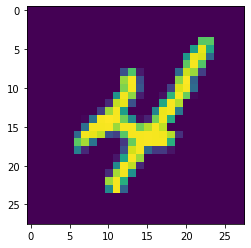

In [5]:
# Displaying an image
plt.imshow(X_train[9])
plt.show
print(y_train[9])

In [4]:
# reshaping array
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)

In [5]:

# Normalization
X_train= X_train.astype('float32')
X_train /=255

X_test= X_test.astype('float32')
X_test /=255



In [6]:
print(y_train[0])
# one hot vector encoding
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)
print(y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
# Building CNN Model
model=keras.models.Sequential()

input_shape=(28,28,1)
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10,activation='softmax'))


**Adadelta as optimizer**

In [12]:
# Used Adadelta as optimizer
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0133 - accuracy: 0.9955 - val_loss: 0.0360 - val_accuracy: 0.9927
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0123 - accuracy: 0.9956 - val_loss: 0.0359 - val_accuracy: 0.9927
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0114 - accuracy: 0.9961 - val_loss: 0.0359 - val_accuracy: 0.9927
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0135 - accuracy: 0.9955 - val_loss: 0.0358 - val_accuracy: 0.9927
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0129 - accuracy: 0.9955 - val_loss: 0.0358 - val_accuracy: 0.9928
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0124 - accuracy: 0.9956 - val_loss: 0.0357 - val_accuracy: 0.9928
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0124 - accuracy: 0.9959 - val_loss: 0.0357 - val_accuracy:

In [13]:

# Evaluating the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Loss:{test_loss}")
print(f"\nTest Accuracy:{test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0352 - accuracy: 0.9928

Test Loss:0.03515298292040825

Test Accuracy:0.9927999973297119


**Adam as optimizer**

In [8]:
# use Adam  as optimizer when fitting model
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1890 - accuracy: 0.9428 - val_loss: 0.0454 - val_accuracy: 0.9838
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0800 - accuracy: 0.9763 - val_loss: 0.0390 - val_accuracy: 0.9876
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0628 - accuracy: 0.9813 - val_loss: 0.0319 - val_accuracy: 0.9892
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0470 - accuracy: 0.9857 - val_loss: 0.0321 - val_accuracy: 0.9904
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0406 - accuracy: 0.9870 - val_loss: 0.0320 - val_accuracy: 0.9913
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0343 - accuracy: 0.9891 - val_loss: 0.0302 - val_accuracy: 0.9918
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0303 - accuracy: 0.9909 - val_loss: 0.0299 - val_accuracy:

Adam optimizer, AdaDelta optimizer both gave almost sinmilar accuracy

In [9]:
# Evaluating the model while using Adam optimizer
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Loss:{test_loss}")
print(f"\nTest Accuracy:{test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0361 - accuracy: 0.9926

Test Loss:0.03608330339193344

Test Accuracy:0.9926000237464905


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


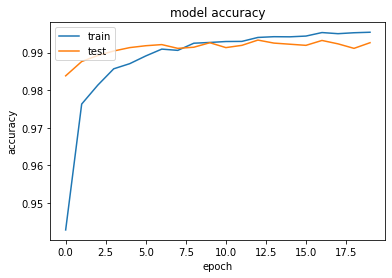

In [10]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

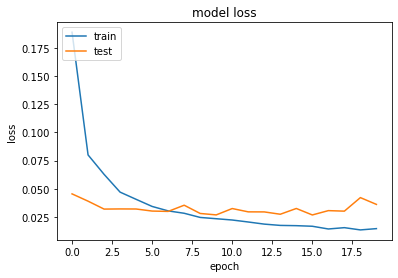

In [11]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()